<a href="https://colab.research.google.com/github/mostaphafakihi/Simulation/blob/main/PRsimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet de simulation d'un super marché**






In [ ]:
import numpy as np
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import math 
#plot
plt.rcParams['figure.figsize'] = (12, 9)


In [ ]:
#la fonction alea
def aleas(IX,IY,IZ):
        IX[0] = 171 * ( IX[0] % 177 ) - 2 *  (IX[0] // 177 ) 
        IY[0] = 172 * ( IY[0] % 176 ) - 35 * ( IY[0] // 176 ) 
        IZ[0] = 170 * ( IZ[0] % 178 ) - 63 * ( IZ[0] //178 ) 
        if ( IX[0]<0 ):
            IX[0] = IX[0] + 30269  
        if ( IY[0]< 0 ) :
               IY[0] = IY[0] + 30307 
        if (IZ[0]< 0 ) :
            IZ[0] = IZ[0] + 30323 
        inter = ( ( IX[0] / 30269 ) + ( IY[0] / 30307 ) + ( IZ[0] / 30323 ) )
        alea  = inter - int ( inter ) 
        return alea
           

In [ ]:
def F1(alea):
    if alea >= 0 and alea < 0.3:
        return 1
    elif alea >= 0.3 and alea <= 0.8:
        return 2
    elif alea > 0.8 and alea <= 0.9:
        return 3
    elif alea > 0.9 and alea <= 0.95:
        return 4
    elif alea > 0.95 and alea <= 0.98:
        return 5
    else:
        return 6


def F2(alea):
    if alea >= 0 and alea < 0.1:
        return 2
    elif alea >= 0.1 and alea < 0.3:
        return 4
    elif alea >= 0.3 and alea <= 0.7:
        return 6
    elif alea > 0.7 and alea <= 0.9:
        return 8
    else:
        return 10


def F3(alea):
    if alea >= 0 and alea < 0.2:
        return 1
    elif alea >= 0.2 and alea <= 0.6:
        return 2
    elif alea > 0.6 and alea <= 0.85:
        return 3
    else:
        return 4

In [ ]:
#Trier le calendrier
def Trier_cal(calendrier):
    l = len(calendrier)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (calendrier[j][2] > calendrier[j + 1][2]):
                tempo = calendrier[j]
                calendrier[j]= calendrier[j + 1]
                calendrier[j + 1]= tempo
    return calendrier

In [ ]:
#pour planidier un événement
def planif_eve(evt=[]):
    cal_tri.append(evt)
    return cal_tri
#selectionner un événement    
def select_eve(cal_tri):
    evt_p=cal_tri[0]
    cal_tri.pop(0)
    return evt_p

In [ ]:
def intervalle_confiance(NCP):
  moy_NCP=np.array(NCP)
  n=len(moy_NCP)
  m=np.mean(moy_NCP)
  s=statistics.stdev(moy_NCP,m)
  IC=[m-1.96*(s//math.sqrt(n)),m+1.96*(s//math.sqrt(n))]
  return IC

# **Scénario 1(simulation avec deux caisses)**

In [ ]:
    # Initialiser le calendrier par la 1ère arrivée du 1er client 
    IX=[0]
    IY=[0]
    IZ=[0]
    IX[0]= int(input("Entrez la valeur du premier germe IX: "))
    while (IX[0] <1 or IX[0] >30000):
            IX[0] = int(input("la valeur que vous avez saisie ne convient pas"))
            
    IY[0]= int(input("Entrez la valeur du deuxieme germe IY: "))
    while (IY[0] <1 or IY[0] >30000):
            IY[0] = int(input("la valeur que vous avez saisie ne convient pas"))
            
    IZ[0]= int(input("Entrez1 la valeur du dernier germe IZ: "))
    while (IZ[0] <1 or IZ[0] >30000):
            IZ[0] = int(input("la valeur que vous avez saisie ne convient pas"))

Entrez la valeur du premier germe IX: 10
Entrez la valeur du deuxieme germe IY: 100
Entrez1 la valeur du dernier germe IZ: 1000


In [ ]:
resultat=[]
resultat_sanspi=[]
for k in range(40):   
    H = 0         # Horloge de simulation 
    i = 1         # numéro client arrivé à chaque fois 
    LQ = 0        # Longueur Queue 
    NCP = 0       # Nombre Clients Perdus
    NCE = 0       # Nombre Clients Entrés 
    C1 = 0        # état caisse 1 libre 
    C2 = 0        # état caisse 2 libre 
    t1 = 0
    t2 = 0 
    s1 = 0
    s2 = 0
    DEQ = 0
    DSQ = 0
    tj = 0
    Q=[]
    tmp1=0
    tmp2=0
    TSmoy = 0
    TATmoy = 0 
    TauC1 =0 
    TauC2 = 0
    Qj=[]
    # Initialiser le calendrier par la 1ère arrivée du 1er client 
    evt=[]
    a=aleas(IX,IY,IZ)
    evt1=[1,'A',F1(a)]
    cal_tri=[evt1]
    file=[]
    while (len(cal_tri)!=0):
        cal_tri=Trier_cal(cal_tri)
        evt_sel=select_eve(cal_tri)
        H=evt_sel[2]
        if (evt_sel[1] == 'A'):
              if (LQ <= 1):
                NCE = NCE+1
                planif_eve([evt_sel[0],'FM',H+F2(aleas(IX,IY,IZ))])
              else:
                NCP = NCP+1
              i=i+1
              DA=H+F1(aleas(IX,IY,IZ))
              if (DA<=720):
                planif_eve([i,'A',DA])
        
        if (evt_sel[1] == 'FM'):

              if (C1==0 or C2==0):
                if (C1==0):
                  C1=evt_sel[0]
                  t1=t1+(H-s1)
                  
                else:
                  C2=evt_sel[0] 
                  t2=t2+(H-s2)
                tmp1=H+F3(aleas(IX,IY,IZ))
                planif_eve([evt_sel[0],'FP',tmp1])
                DEQ=DEQ+tmp1
              else :      
                LQ=LQ+1
                s1=H 
                s2=H
                file.append(evt_sel[0])
      
        if (evt_sel[1] == 'FP'):

            if (LQ==0):
              if (C1==evt_sel[0]):
                  C1=0
                  
              else:
                C2=0
            else:
              j=file[0]
              file.pop(0)
              LQ=LQ-1
              tj=tj+(H-s1)
              Q.append(tj)
              if (C1==evt_sel[0]):
                C1=j
              else:
                C2=j
              tmp2=H+F3(aleas(IX,IY,IZ))
              planif_eve([j,'FP',tmp2])
              DSQ=DSQ+tmp2                                   
    DFS=H
    Qj=[element * (1/DFS) for element in Q]
    TauC1=t1/DFS
    TauC2=t2/DFS
    TATmoy=(DSQ-DEQ)/NCE
    TSmoy=(H-DA)/NCE
    resultat.extend([[DFS,NCE, NCP,TSmoy ,TATmoy ,TauC1 ,TauC2]])
    IX[0]=IX[0]+10+k*10
    IY[0]=IY[0]+30+k*30
    IZ[0]=IZ[0]+20+k*20


In [ ]:
df1 = pd.DataFrame(resultat, columns =['DFS','NCE', 'NCP','TSmoy' ,'TATmoy' ,'TauC1' ,'TauC2'],index=['sim1','sim2','sim3','sim4','sim5','sim6','sim7','sim8','sim9','sim10','sim11','sim12','sim13','sim14','sim15','sim16','sim17','sim18','sim19','sim20','sim21','sim22','sim23','sim24','sim25','sim26','sim27','sim28','sim29','sim30','sim31','sim32','sim33','sim34','sim35','sim36','sim37','sim38','sim39','sim40'])
df1


,DFS,NCE,NCP,TSmoy,TATmoy,TauC1,TauC2
sim1,726,342,6,0.014620,-122.146199,1.844353,1.511019
sim2,728,349,10,0.017192,-125.074499,1.486264,1.182692
sim3,727,326,12,0.018405,-124.690184,2.287483,1.766162
sim4,730,356,3,0.016854,-116.775281,1.608219,1.397260
sim5,729,336,8,0.023810,-170.196429,2.124829,1.851852
sim6,730,341,7,0.026393,-128.096774,2.143836,1.536986
sim7,729,328,11,0.024390,-135.423780,1.914952,1.566529
sim8,732,335,10,0.029851,-134.414925,1.908470,1.445355
sim9,724,345,13,0.008696,-103.008696,1.607735,1.339779
sim10,725,340,10,0.008824,-98.667647,2.053793,1.573793


# **Scénario 2(simulation avec 3 caisses)**

In [ ]:
    # Initialiser le calendrier par la 1ère arrivée du 1er client 
    IX=[0]
    IY=[0]
    IZ=[0]
    IX[0]= int(input("Entrez la valeur du premier germe IX: "))
    while (IX[0] <1 or IX[0] >30000):
            IX[0] = int(input("la valeur que vous avez saisie ne convient pas"))
            
    IY[0]= int(input("Entrez la valeur du deuxieme germe IY: "))
    while (IY[0] <1 or IY[0] >30000):
            IY[0] = int(input("la valeur que vous avez saisie ne convient pas"))
            
    IZ[0]= int(input("Entrez la valeur du dernier germe IZ: "))
    while (IZ[0] <1 or IZ[0] >30000):
            IZ[0] = int(input("la valeur que vous avez saisie ne convient pas"))

Entrez la valeur du premier germe IX: 10
Entrez la valeur du deuxieme germe IY: 100
Entrez la valeur du dernier germe IZ: 1000


In [ ]:
data=[]
data_sanspi=[]
for k in range(40):   
    H = 0        #(* Horloge de simulation *)
    i = 1        #(* numéro client arrivé à chaque fois *)
    LQ = 0        #(* Longueur Queue *)
    NCP = 0      #(* Nombre Clients Perdus *)
    NCE = 0       #(* Nombre Clients Entrés *)
    C1 = 0        #(* état caisse 1 libre *)
    C2 = 0        #(* état caisse 2 libre *)
    C3 = 0
    t1 = 0
    t2 = 0 
    t3 = 0
    s1 = 0
    s2 = 0
    s3 = 0
    tmp1=0
    tmp2=0
    DEQ = 0
    DSQ = 0
    MTS=0
    TATmoy=0
    TauC1=0
    TauC2=0
    TauC3=0
    Qj=[]
    # Initialiser le calendrier par la 1ère arrivée du 1er client 
    evt=[]
    a=aleas(IX,IY,IZ)
    evt1=[1,'A',F1(a)]
    cal_tri=[evt1]
    file=[]
    while (len(cal_tri)!=0):
        cal_tri=Trier_cal(cal_tri)
        evt_sel=select_eve(cal_tri)
        H=evt_sel[2]
        if (evt_sel[1] == 'A'):
              if (LQ <= 1):
                NCE = NCE+1
                planif_eve([evt_sel[0],'FM',H+F2(aleas(IX,IY,IZ))])
              else:
                NCP = NCP+1
              i=i+1
              DA=H+F1(aleas(IX,IY,IZ))
              if (DA<=720):
                planif_eve([i,'A',DA])
        
        if (evt_sel[1] == 'FM'):

              if (C1==0 or C2==0 or C3==0):
                if (C1==0):
                  C1=evt_sel[0]
                  t1=t1+(H-s1)
                  
                if (C2==0):
                  C2=evt_sel[0] 
                  t2=t2+(H-s2)
                else:
                  C3=evt_sel[0] 
                  t3=t3+(H-s3)
                tmp1=H+F3(aleas(IX,IY,IZ))
                planif_eve([evt_sel[0],'FP',tmp1])
                DEQ=DEQ+tmp1
              else :      
                LQ=LQ+1
                s1=H 
                s2=H
                s3=H
                file.append(evt_sel[0])
        if (evt_sel[1] == 'FP'):

            if (LQ==0):
              if (C1==evt_sel[0]):
                  C1=0
                  
              if (C2==evt_sel[0]):
                  C2=0
              else: 
                  C3=0
            else:
              j=file[0]
              file.pop(0)
              LQ=LQ-1
              tj=tj+(H-s1)
              Q.append(tj)
              if (C1==evt_sel[0]):
                C1=j
              if(C2==evt_sel[0]):
                C2=j
              else:
                C3=j
              tmp2=H+F3(aleas(IX,IY,IZ))
              planif_eve([j,'FP',tmp2])
              DSQ=DSQ+tmp2
              
    DFS=H
    Qj=[element * (1/DFS) for element in Q]
    pi=sum(Qj)
    p1=Qj[0]
    TauC1=t1/DFS
    TauC2=t2/DFS
    TauC3=t3/DFS
    TATmoy=(DSQ-DEQ)/NCE
    TSmoy=(H-DA)/NCE    
    data.extend([[DFS,NCE, NCP,TATmoy,TSmoy,TauC1,TauC2,TauC3]])
    IX[0]=IX[0]+10+k*10
    IY[0]=IY[0]+30+k*30
    IZ[0]=IZ[0]+20+k*20


In [ ]:
df2 = pd.DataFrame(data, columns =['DFS','NCE', 'NCP','TATmoy','TSmoy','TauC1','TauC2','TauC3',],index=['sim1','sim2','sim3','sim4','sim5','sim6','sim7','sim8','sim9','sim10','sim11','sim12','sim13','sim14','sim15','sim16','sim17','sim18','sim19','sim20','sim21','sim22','sim23','sim24','sim25','sim26','sim27','sim28','sim29','sim30','sim31','sim32','sim33','sim34','sim35','sim36','sim37','sim38','sim39','sim40'])
df2

,DFS,NCE,NCP,TATmoy,TSmoy,TauC1,TauC2,TauC3
sim1,726,342,6,-122.146199,0.014620,1.844353,1.844353,1.511019
sim2,728,349,10,-125.074499,0.017192,1.486264,1.486264,1.182692
sim3,727,326,12,-124.690184,0.018405,2.287483,2.287483,1.766162
sim4,730,356,3,-116.775281,0.016854,1.608219,1.608219,1.397260
sim5,729,336,8,-170.196429,0.023810,2.124829,2.124829,1.851852
sim6,730,341,7,-128.096774,0.026393,2.143836,2.143836,1.536986
sim7,729,328,11,-135.423780,0.024390,1.914952,1.914952,1.566529
sim8,732,335,10,-134.414925,0.029851,1.908470,1.908470,1.445355
sim9,724,345,13,-103.008696,0.008696,1.607735,1.607735,1.339779
sim10,725,340,10,-98.667647,0.008824,2.053793,2.053793,1.573793


description du scénario 1

In [ ]:
df1.describe()

,DFS,NCE,NCP,TSmoy,TATmoy,TauC1,TauC2
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,728.375000,339.050000,9.950000,0.019770,-116.199535,1.790502,1.408344
std,2.328062,6.957564,2.630687,0.006923,24.413463,0.233348,0.190374
min,724.000000,326.000000,3.000000,0.008696,-170.196429,1.429161,1.094262
25%,726.750000,335.750000,8.750000,0.014750,-129.404925,1.634004,1.264284
50%,728.000000,339.000000,10.000000,0.020144,-120.979709,1.783872,1.405930
75%,730.000000,342.250000,12.000000,0.023863,-100.353031,1.910090,1.514591
max,733.000000,356.000000,14.000000,0.032836,-65.517647,2.490358,1.924242


description des données du scénario 2





In [ ]:
df2.describe()

,DFS,NCE,NCP,TATmoy,TSmoy,TauC1,TauC2,TauC3
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,728.375000,339.050000,9.950000,-116.199535,0.019770,1.790502,1.790502,1.408344
std,2.328062,6.957564,2.630687,24.413463,0.006923,0.233348,0.233348,0.190374
min,724.000000,326.000000,3.000000,-170.196429,0.008696,1.429161,1.429161,1.094262
25%,726.750000,335.750000,8.750000,-129.404925,0.014750,1.634004,1.634004,1.264284
50%,728.000000,339.000000,10.000000,-120.979709,0.020144,1.783872,1.783872,1.405930
75%,730.000000,342.250000,12.000000,-100.353031,0.023863,1.910090,1.910090,1.514591
max,733.000000,356.000000,14.000000,-65.517647,0.032836,2.490358,2.490358,1.924242


In [ ]:
IC1 = intervalle_confiance(df1['NCP'])
IC1

[131.495, 143.255]

In [ ]:
IC2 = intervalle_confiance(df2['NCP'])
IC2

[127.345, 139.105]

# **Représentation graphique**

# *Scénario 1*

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

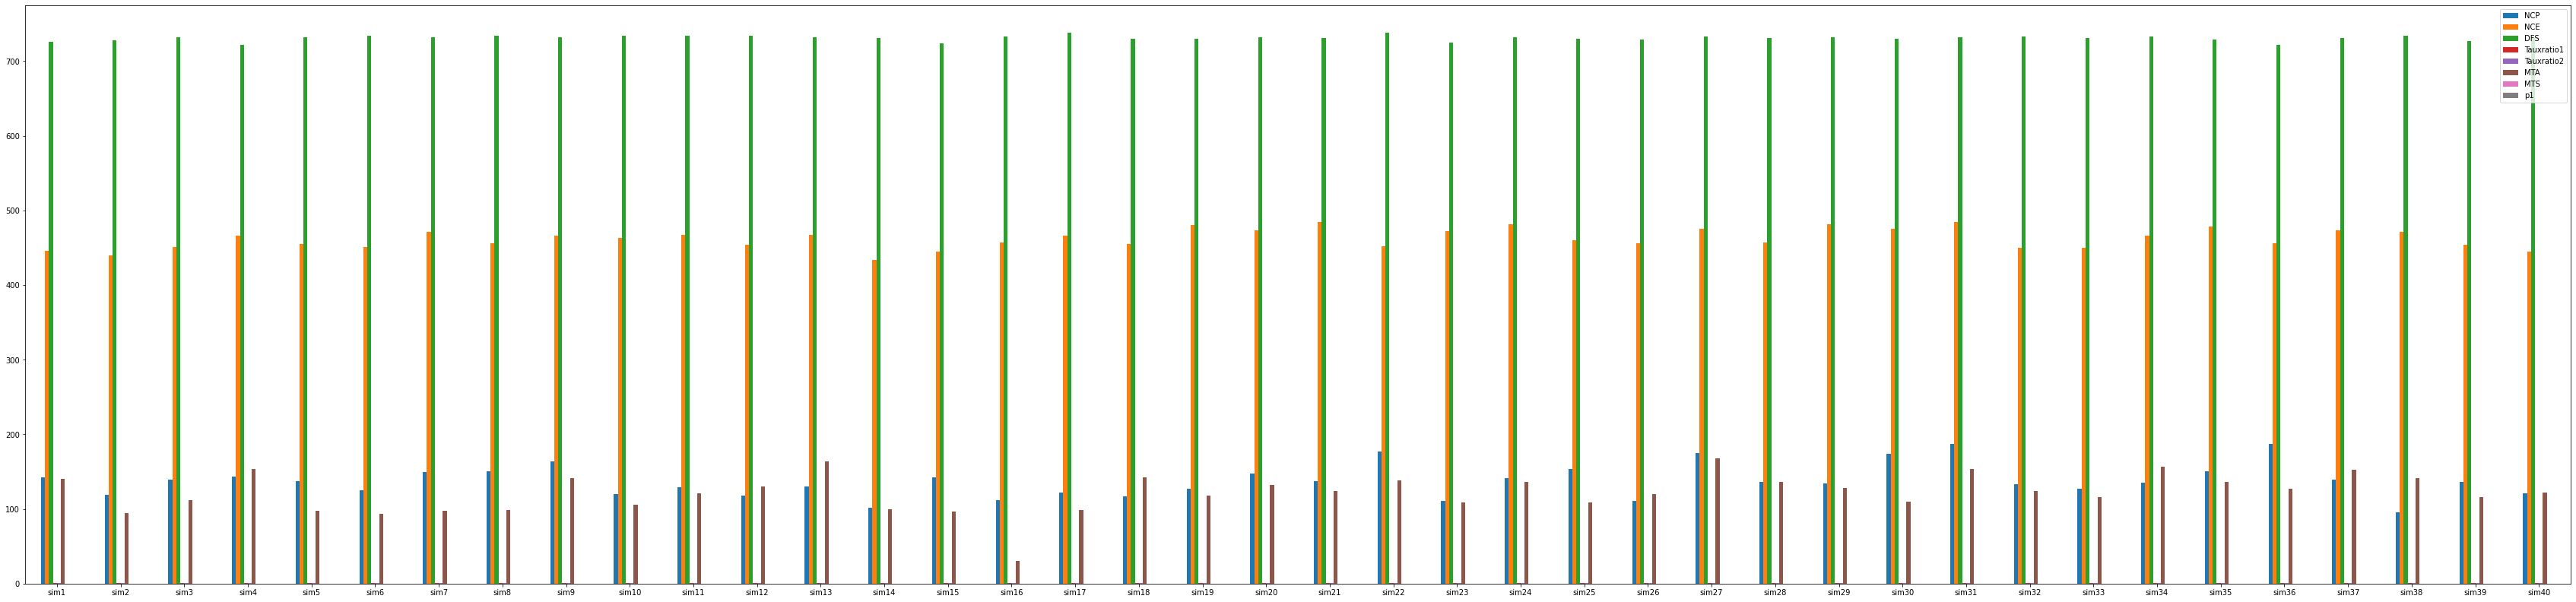

In [ ]:
df1_sanspi.plot.bar(rot=0,figsize=(60,14))
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

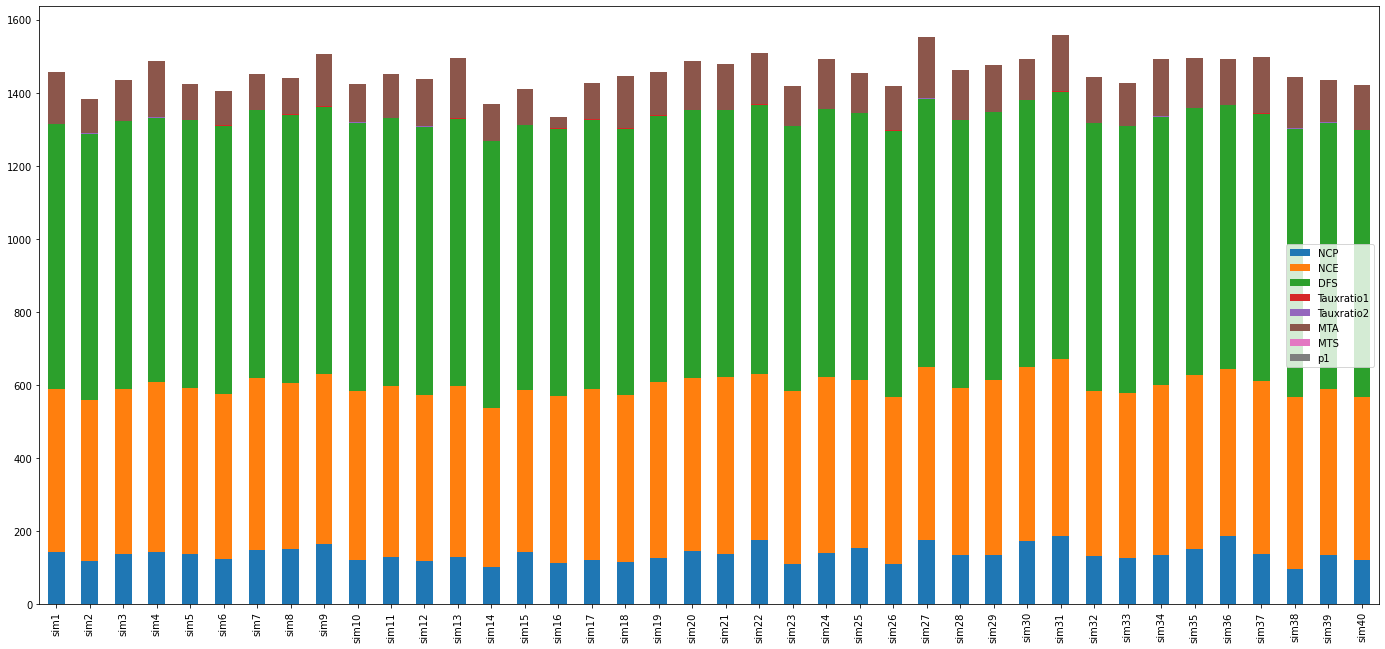

In [ ]:
df1_sanspi.plot.bar(stacked=True,figsize=(24, 11))

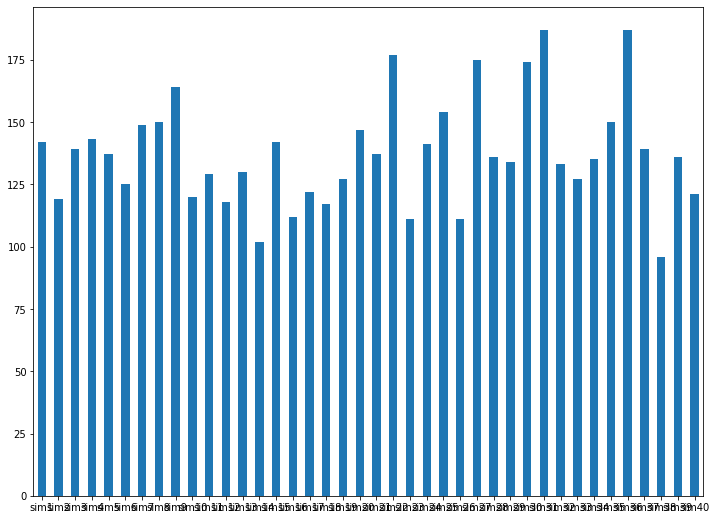

In [ ]:
df1['NCP'].plot.bar(rot=0)

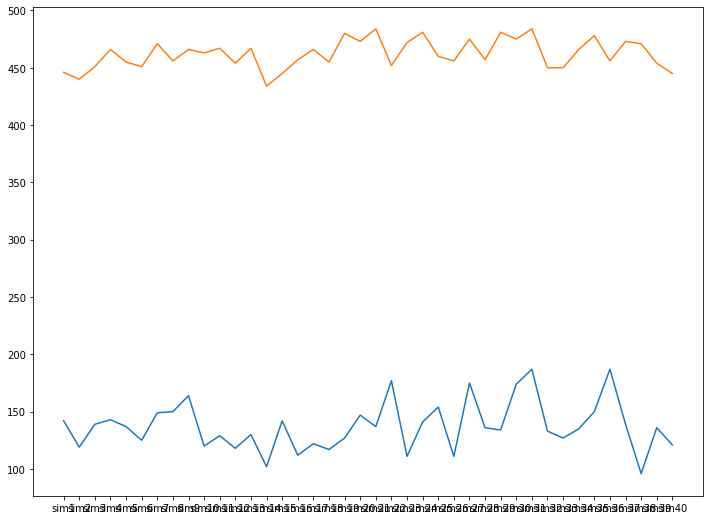

In [ ]:
plt.figure()
plt.plot(df1['NCP'])
plt.plot(df1['NCE'])

Text(0.5, 1.0, 'Distribution de NCP')

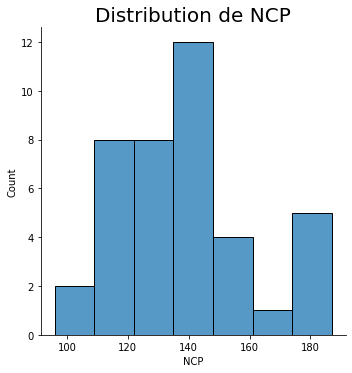

In [ ]:
sns.displot(df1['NCP'])
plt.title("Distribution de NCP", fontsize=20)

# *Scénario 2*

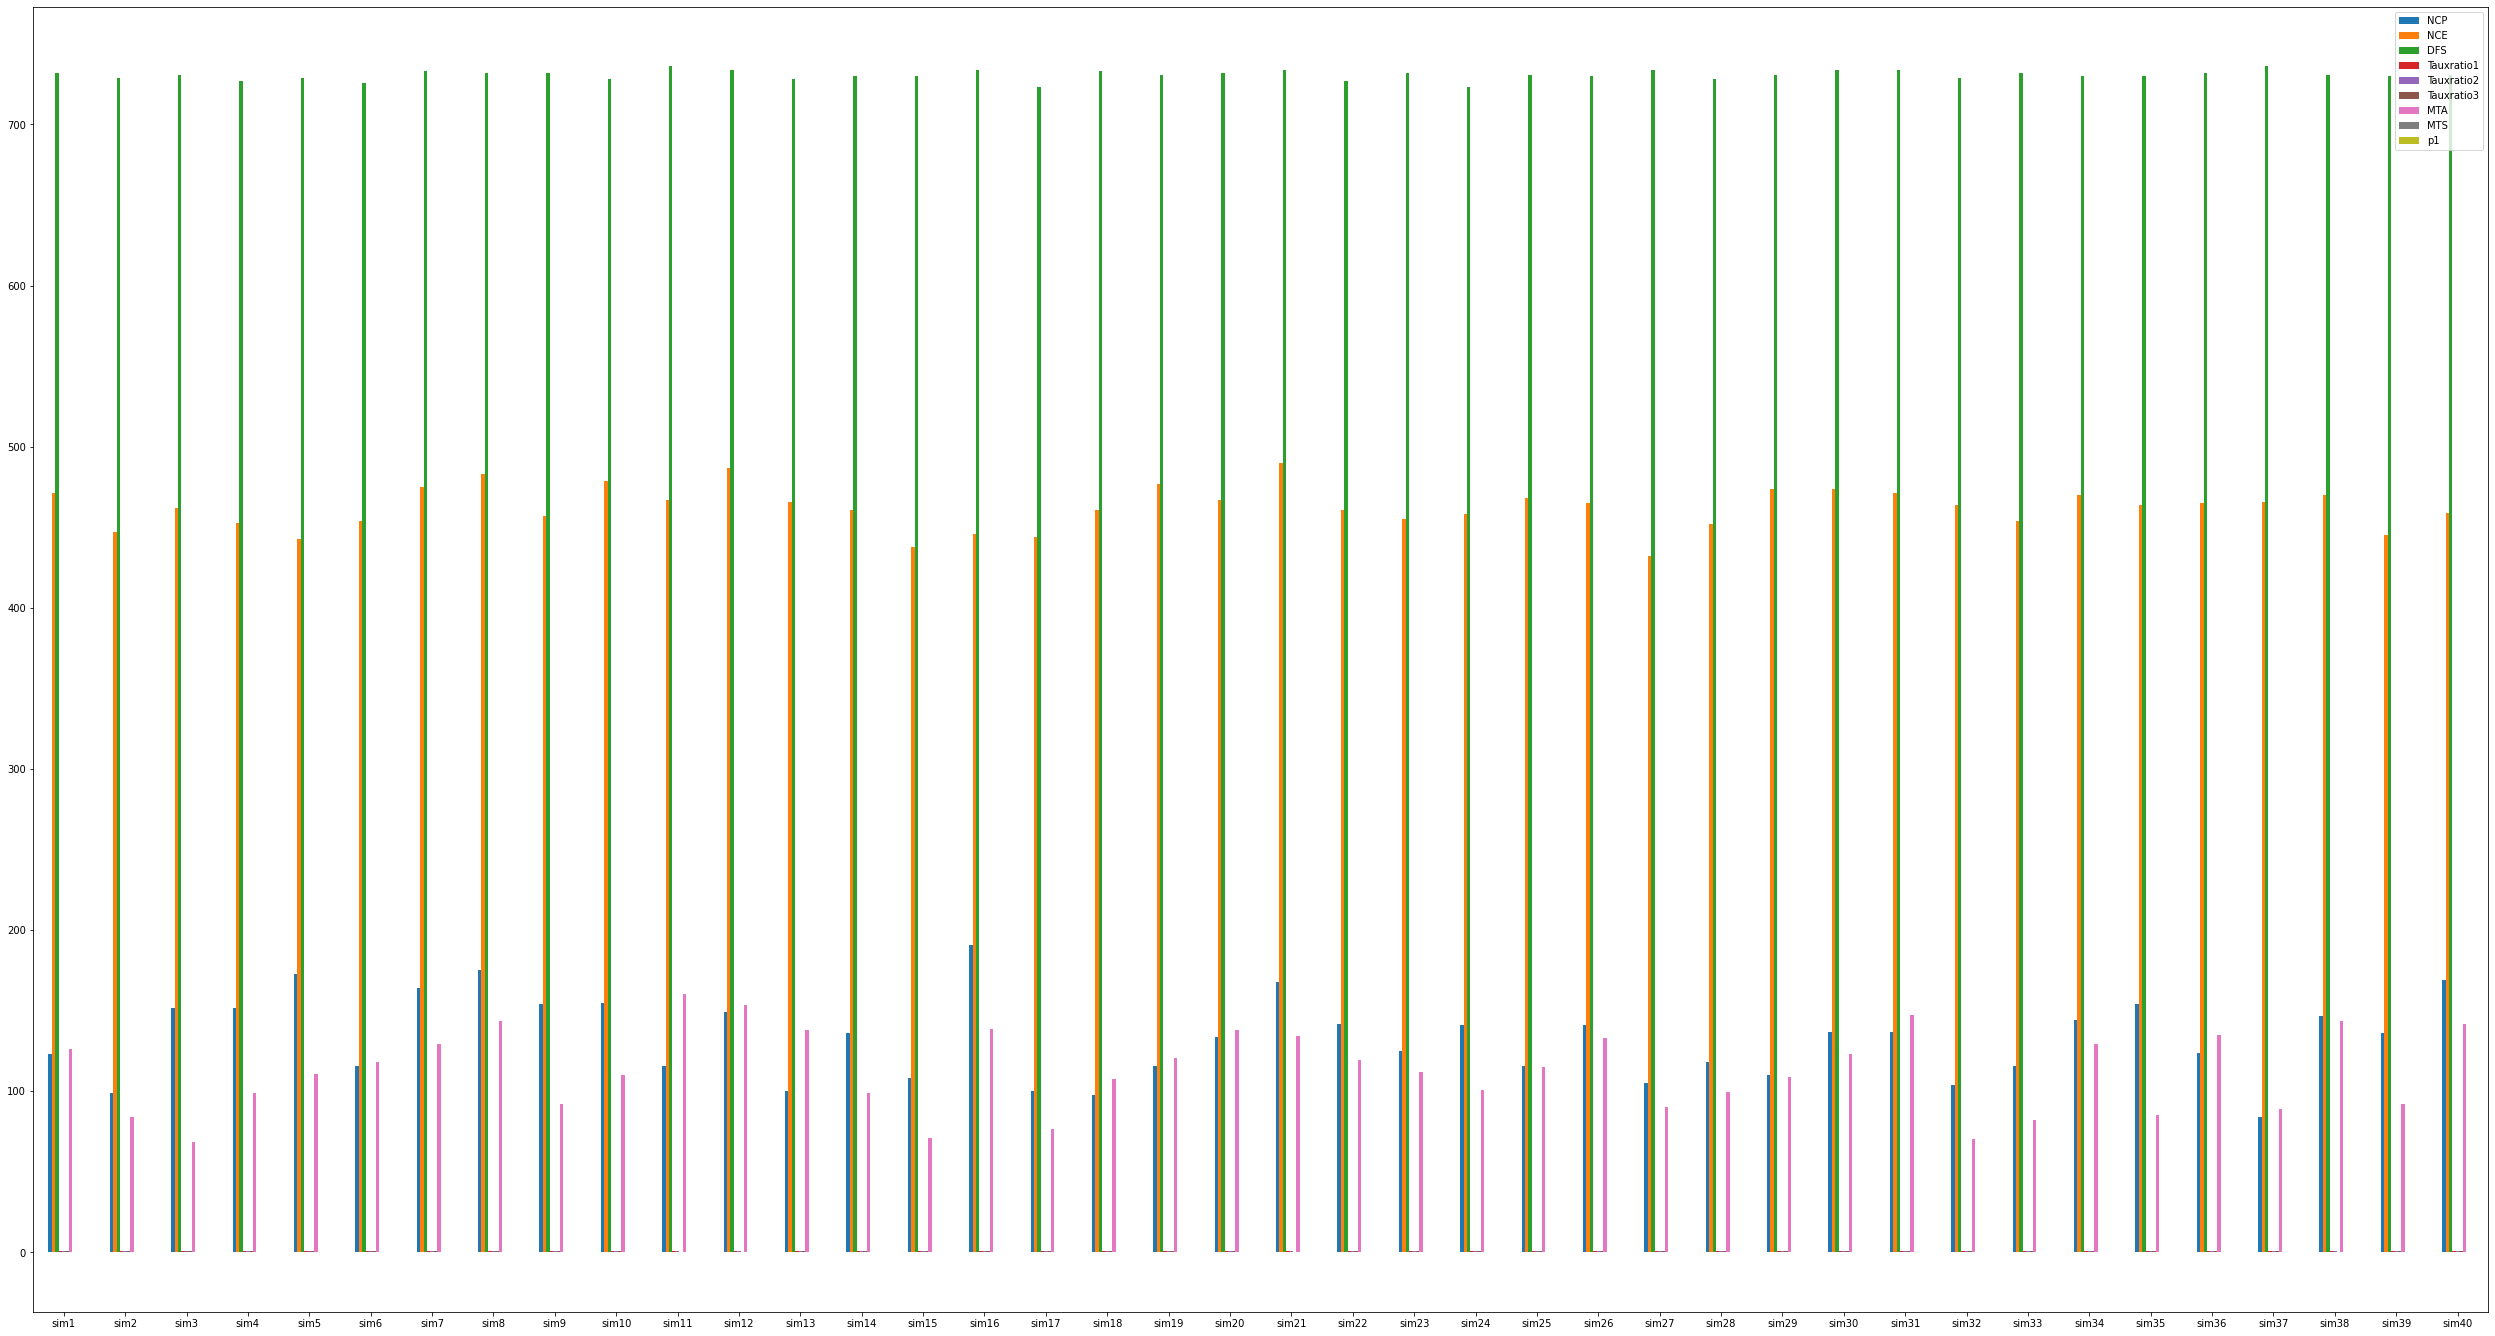

In [ ]:
df2_sanspi.plot.bar(rot=0,figsize=(44,24))

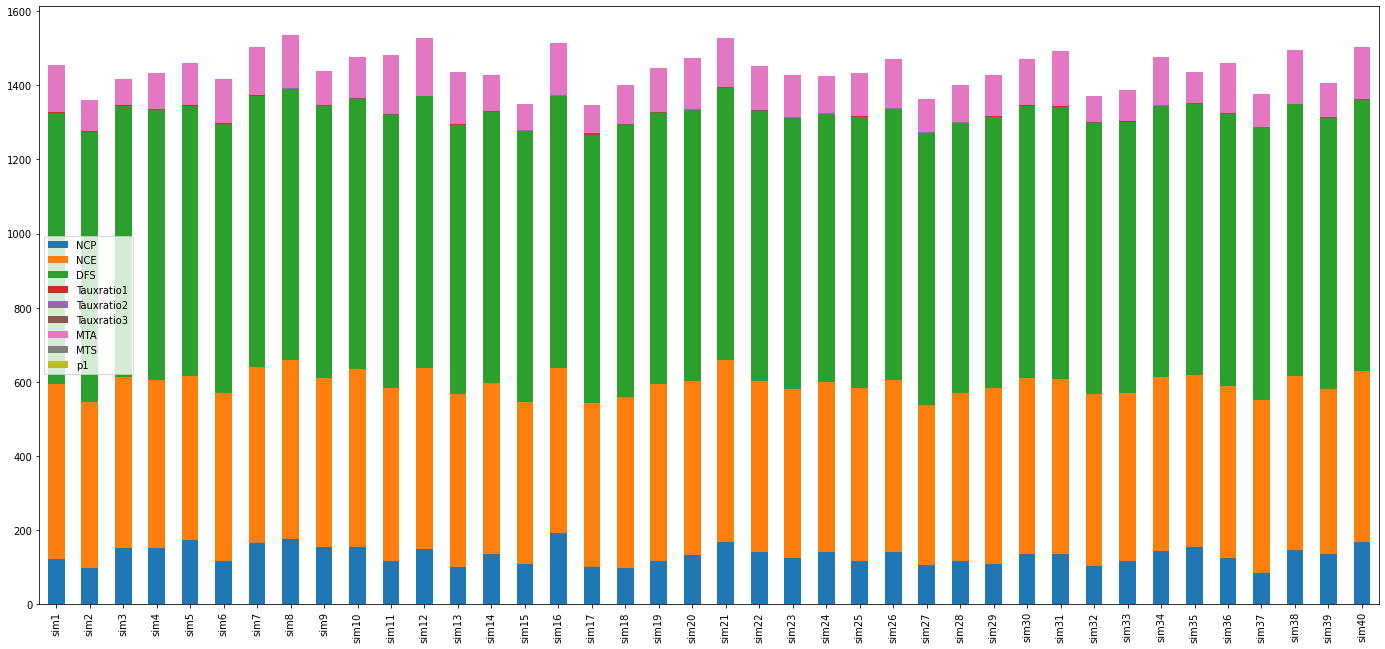

In [ ]:
df2_sanspi.plot.bar(stacked=True,figsize=(24, 11))

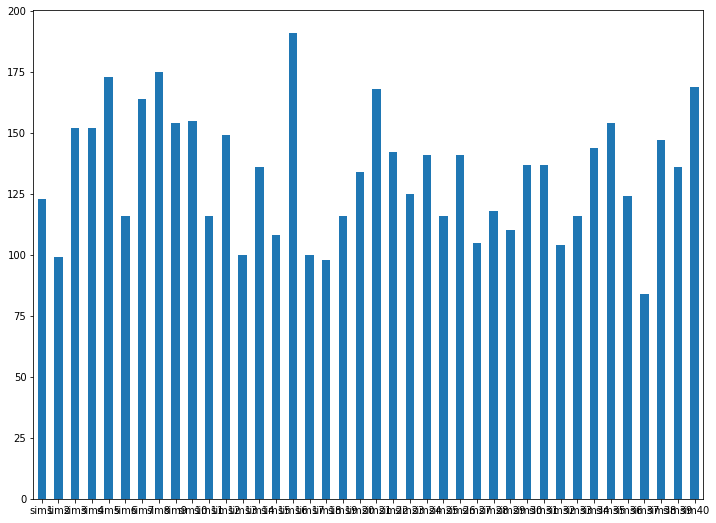

In [ ]:
df2['NCP'].plot.bar(rot=0)


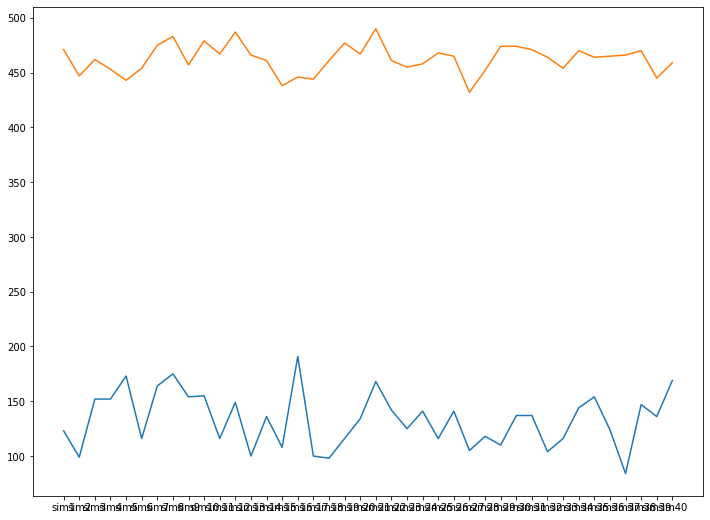

In [ ]:
plt.figure()
plt.plot(df2['NCP'])
plt.plot(df2['NCE'])


Text(0.5, 1.0, 'Distribution de NCP')

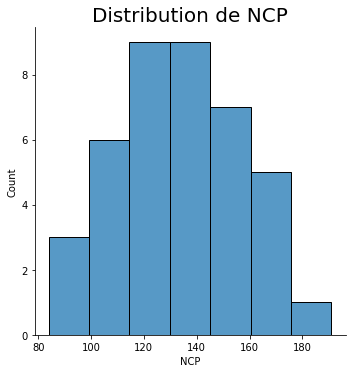

In [ ]:
sns.displot(df2['NCP'])
plt.title("Distribution de NCP", fontsize=20)